In [1]:
import sys
sys.path.insert(0, '../gofher')

import os
import matplotlib.image as mpimg

from gofher import run_gofher
from visualize import visualize

In [2]:
name = "IC1755"
paper_label = "SW"
folder = "figure8"

In [3]:
#path_to_input = "..\\..\\spin-parity-catalog-data\\panstarrs\\{}".format(folder)
#path_to_output = "..\\..\\..\\"
path_to_input = "../../spin-parity-catalog-data/panstarrs/{}".format(folder)
path_to_output = "../../../"

In [4]:
def get_fits_path(name,band):
    """the file path of where existing fits files can be found"""
    return os.path.join(path_to_input,name,"{}_{}.fits".format(name,band))

def get_color_image_path(name):
    return os.path.join(path_to_input,name,"{}_color.jfif".format(name))

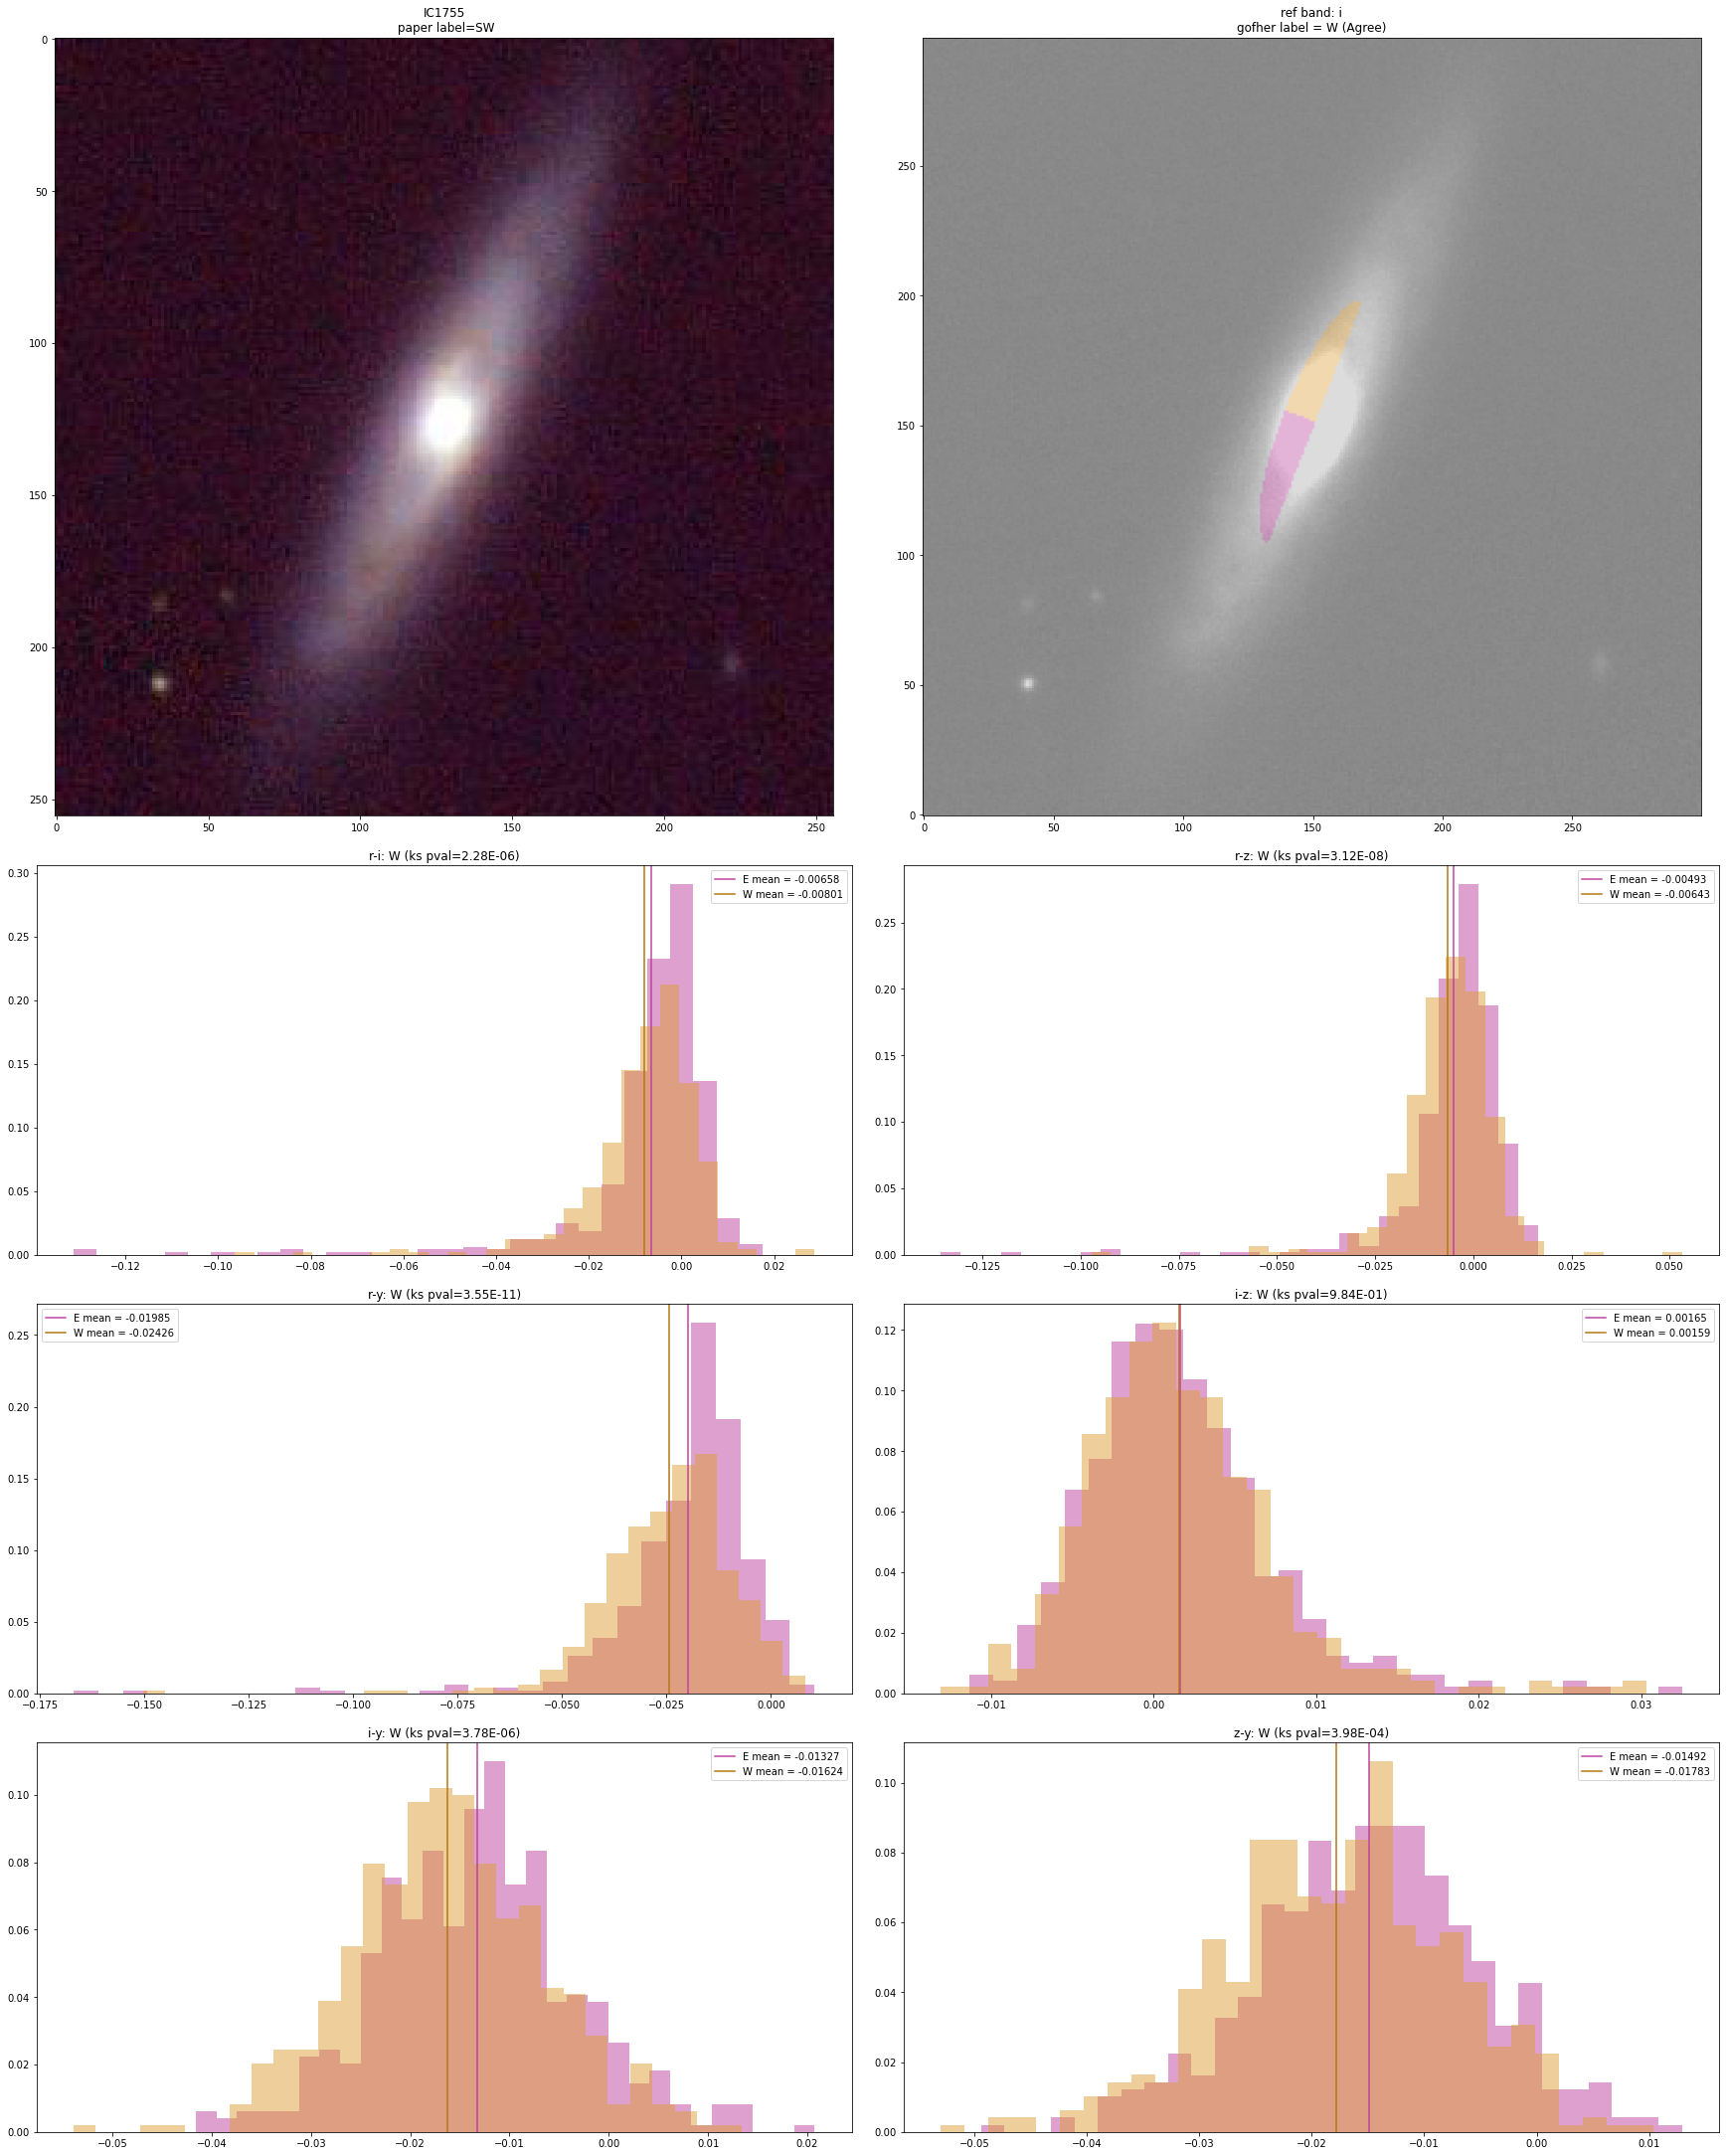

['name', 'paper_label', 'pos_label', 'neg_label', 'r-i_pos_mean', 'r-i_neg_mean', 'r-i_mean_diff', 'r-i_ks_stat', 'r-i_ks_pval', 'r-i_label', 'r-i_score', 'r-z_pos_mean', 'r-z_neg_mean', 'r-z_mean_diff', 'r-z_ks_stat', 'r-z_ks_pval', 'r-z_label', 'r-z_score', 'r-y_pos_mean', 'r-y_neg_mean', 'r-y_mean_diff', 'r-y_ks_stat', 'r-y_ks_pval', 'r-y_label', 'r-y_score', 'i-z_pos_mean', 'i-z_neg_mean', 'i-z_mean_diff', 'i-z_ks_stat', 'i-z_ks_pval', 'i-z_label', 'i-z_score', 'i-y_pos_mean', 'i-y_neg_mean', 'i-y_mean_diff', 'i-y_ks_stat', 'i-y_ks_pval', 'i-y_label', 'i-y_score', 'z-y_pos_mean', 'z-y_neg_mean', 'z-y_mean_diff', 'z-y_ks_stat', 'z-y_ks_pval', 'z-y_label', 'z-y_score', 'total', 'score']
['IC1755', 'SW', 'E', 'W', -0.00657706470617573, -0.008010871583424813, 0.0014338068772490825, 0.16606675256660708, 2.278172615888252e-06, 'W', 1, -0.0049301091441220765, -0.006425408903528385, 0.001495299759406309, 0.19047757595910053, 3.118548153047129e-08, 'W', 1, -0.019846414522193902, -0.02425542

In [5]:
if not os.path.exists(path_to_input):
    raise ValueError("The path to the input is not found {} - make sure you update path_to_input".format(path_to_input))

if not os.path.exists(path_to_output):
    raise ValueError("The path output is not found {} - make sure you update ppath_to_output".format(path_to_output))

gal = run_gofher(name,get_fits_path,['g','r','i','z','y'],['i','z','y','r'], paper_label)

color_image = color = mpimg.imread(get_color_image_path(name))
visualize(gal,color_image,['r','i','z','y'],paper_label)

(header,row) = gal.get_verbose_csv_header_and_row(['r','i','z','y'],paper_label)
print(header)
print(row)